<a href="https://colab.research.google.com/github/yani331/DSRP-Research/blob/main/SchoolResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from statsmodels.stats.multicomp import MultiComparison as mc

In [ ]:
url ='/content/data 3.csv'
School_dataa = pd.read_csv(url)

In [ ]:
School_dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Non-Null C

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
pip install statsmodels

In [30]:
!pip install ucimlrepo

In [31]:
from ucimlrepo import fetch_ucirepo
School = fetch_ucirepo(id=697)
School_features = School.data.features
School_targets = School.data.targets
School_data = pd.concat([School_features, School_targets], axis=1)
School_data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [32]:
School_features.columns = School_features.columns.str.strip().str.lower().str.replace(' ', '_')

In [33]:
School_data.dropna(inplace=True)

In [34]:
print(School_data.isnull().sum())

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

```

How does parental education level influence academic success outcomes among college students?

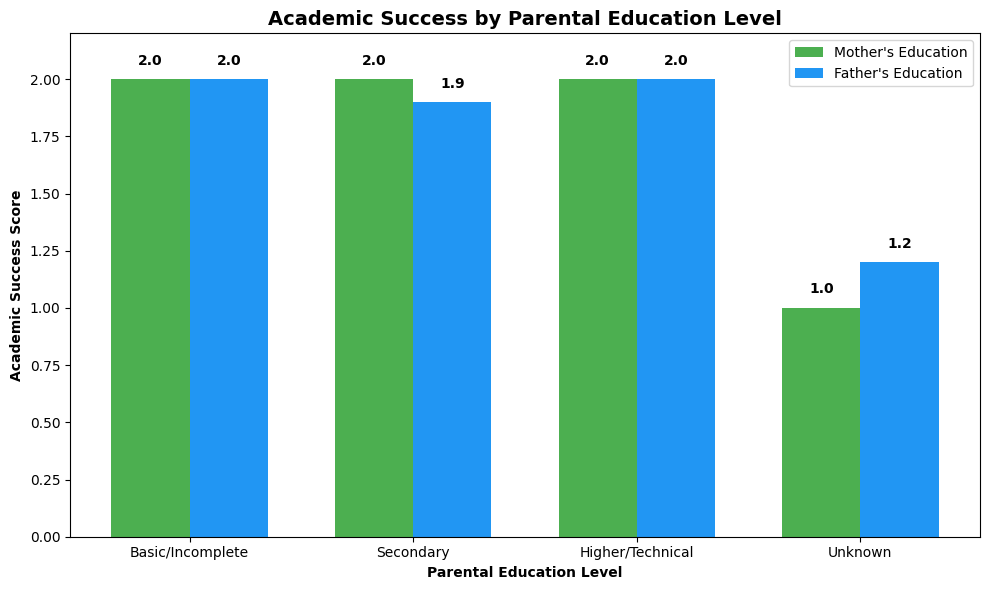

In [35]:
categories = ['Basic/Incomplete', 'Secondary', 'Higher/Technical', 'Unknown']
mother_scores = [2.0, 2.0, 2.0, 1.0]
father_scores = [2.0, 1.9, 2.0, 1.2]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mother_scores, width, label="Mother's Education", color='#4CAF50')
bars2 = ax.bar(x + width/2, father_scores, width, label="Father's Education", color='#2196F3')

ax.set_xlabel('Parental Education Level', fontweight='bold')
ax.set_ylabel('Academic Success Score', fontweight='bold')
ax.set_title('Academic Success by Parental Education Level', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 2.2)
ax.legend()

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height}', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

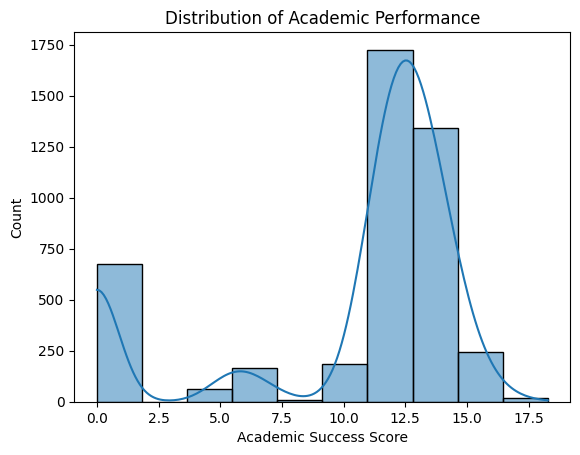

In [36]:
import seaborn as sns

# Calculate academic success score (e.g., average grade)
academic_success_scores = (School_data['Curricular units 1st sem (grade)'] + School_data['Curricular units 2nd sem (grade)']) / 2

sns.histplot(academic_success_scores, bins=10, kde=True)
plt.title('Distribution of Academic Performance')
plt.xlabel('Academic Success Score')
plt.show()

In [37]:
print(School_data['Mother\'s qualification'].value_counts())

Mother's qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
42       4
6        4
43       4
30       3
35       3
36       3
11       3
29       3
10       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: count, dtype: int64


In [38]:
print(School_data['Father\'s qualification'].value_counts())

Father's qualification
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
43       2
41       2
10       2
6        2
35       2
20       1
42       1
18       1
13       1
25       1
44       1
33       1
27       1
31       1
Name: count, dtype: int64


In [49]:
from scipy import stats
# ANOVA for mother’s education level
groups = [academic_success_scores[School_data['Mother\'s qualification'] == level]
          for level in School_data['Mother\'s qualification'].unique()]
anova_result = stats.f_oneway(*groups)
print(f"ANOVA result (Mother), (Father): F={anova_result.statistic:.2f}, p={anova_result.pvalue:.4f}")
print(anova_result)

ANOVA result (Mother), (Father): F=4.33, p=0.0000
F_onewayResult(statistic=np.float64(4.3337328000905), pvalue=np.float64(2.2837252599982004e-13))


In [40]:
# Post-hoc test: Tukey HSD
compare = mc(academic_success_scores, School_data['Mother\'s qualification'])
tukey = compare.tukeyhsd()
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   0.1223    1.0  -1.9068  2.1513  False
     1      3  -0.5343  0.979  -1.5446  0.4759  False
     1      4   0.1268    1.0  -2.4748  2.7283  False
     1      5   0.7181    1.0  -3.2057   4.642  False
     1      6  -5.8471  0.801 -14.7675  3.0732  False
     1      9  -5.5251 0.2023 -11.8445  0.7942  False
     1     10  -4.2999 0.9994 -14.5954  5.9956  False
     1     11    1.314    1.0  -8.9815 11.6095  False
     1     12  -1.9617 0.6798  -4.7629  0.8394  False
     1     14  -4.7944 0.9999 -17.3978  7.8091  False
     1     18   1.9362    1.0 -15.8795 19.7519  False
     1     19  -0.3071 0.9999  -1.1004  0.4863  False
     1     22   3.7404    1.0 -14.0753  21.556  False
     1     26   1.6779    1.0 -16.1378 19.4935  False
     1     27   1.9279    1.0 -15.8878 19.7435  False
     1     29  -5.9638 0.937

In [43]:
def categorize(score):
    if score <= 1.5:
        return 'Low'
    elif score <= 2.0:
        return 'Medium'
    else:
        return 'High'
School_data['performance'] = academic_success_scores.apply(categorize)


In [45]:
School_data['mother_encoded'] = LabelEncoder().fit_transform(School_data['Mother\'s qualification'])
School_data['father_encoded'] = LabelEncoder().fit_transform(School_data['Father\'s qualification'])

X = School_data[['mother_encoded', 'father_encoded']]
y = LabelEncoder().fit_transform(School_data['performance'])

In [47]:
compare = mc(School_data['mother_encoded'], School_data['performance'])
tukey = compare.tukeyhsd()
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  High    Low   0.3636 0.335 -0.3758 1.1031  False
--------------------------------------------------


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       752
           1       0.25      0.02      0.03       133

    accuracy                           0.85       885
   macro avg       0.55      0.50      0.47       885
weighted avg       0.76      0.85      0.78       885



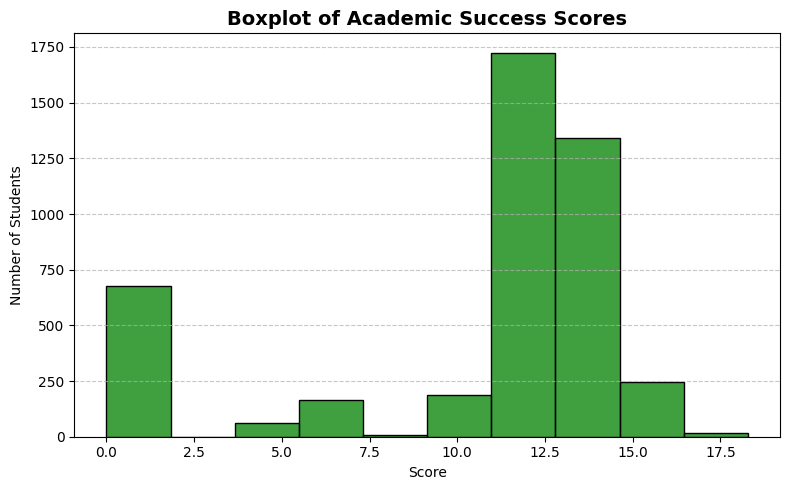

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(academic_success_scores, bins=10, kde=False, color="GREEN")

plt.title('Boxplot of Academic Success Scores', fontsize=14, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


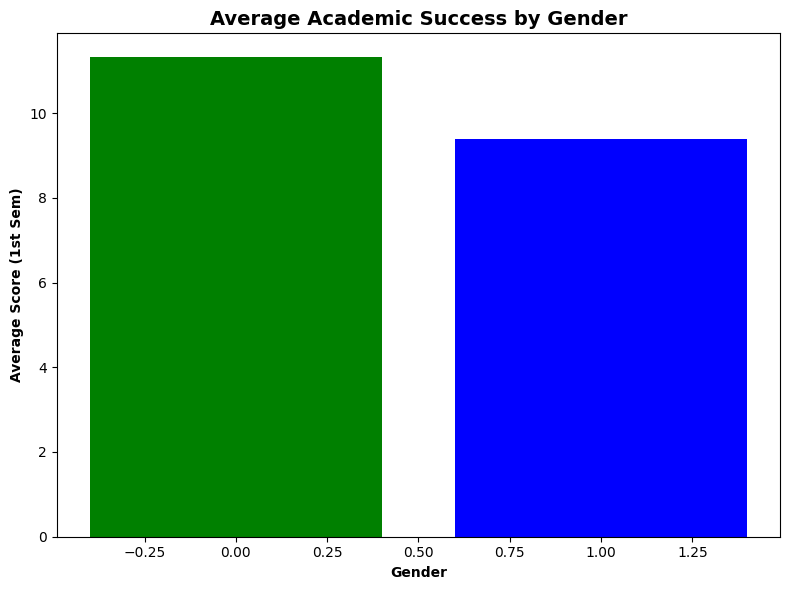

In [51]:
import matplotlib.pyplot as plt

avg_scores = School_data.groupby('Gender')['Curricular units 1st sem (grade)'].mean()
plt.figure(figsize=(8, 6))
plt.bar(avg_scores.index, avg_scores.values, color=['GREEN', 'BLUE'])

plt.title('Average Academic Success by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Average Score (1st Sem)', fontweight='bold')

plt.tight_layout()
plt.show()

In [55]:
School_data = School_data[School_data['Mother\'s qualification'] != 'Unknown']
School_data = School_data[School_data['Father\'s qualification'] != 'Unknown']
School_data = School_data.dropna()